1️⃣ The Fourier Transform converts a function from the time (or spatial) domain into the frequency domain, breaking it into its sinusoidal components.

2️⃣ It generalizes the Fourier series to non-periodic functions by representing any signal as an integral of infinite frequency components instead of a discrete sum.

3️⃣ Widely used in signal processing, physics, and engineering, the Fourier Transform enables efficient analysis of vibrations, wave propagation, image processing, and data compression through the Fast Fourier Transform (FFT) algorithm.

$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos \frac{2\pi n x}{T} + b_n \sin \frac{2\pi n x}{T} \right)
$

$
a_0 = \frac{2}{T} \int_{-T/2}^{T/2} f(x) \,dx
$

$
a_n = \frac{2}{T} \int_{-T/2}^{T/2} f(x) \cos \frac{2\pi n x}{T} \,dx
$

$
b_n = \frac{2}{T} \int_{-T/2}^{T/2} f(x) \sin \frac{2\pi n x}{T} \,dx
$


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_series(func, T, n_terms, x_values):
    """
    Computes the Fourier series approximation of a given periodic function.
    
    Parameters:
    - func: Function handle representing the periodic function f(x).
    - T: Period of the function.
    - n_terms: Number of Fourier terms to include in the series.
    - x_values: Array of x values where the Fourier series will be evaluated.
    
    Returns:
    - fourier_approx: Array of Fourier series approximated values at given x_values.
    """
    # Compute fundamental frequency
    w = 2 * np.pi / T  # Angular frequency
    
    # Compute Fourier coefficients
    a_0 = (2 / T) * np.trapezoid(func(x_values), x_values)  # DC Component
    fourier_approx = a_0 / 2  # Initialize Fourier series with a_0/2
    
    for n in range(1, n_terms + 1):
        # Compute a_n and b_n coefficients using numerical integration
        a_n = (2 / T) * np.trapezoid(func(x_values) * np.cos(n * w * x_values), x_values)
        b_n = (2 / T) * np.trapezoid(func(x_values) * np.sin(n * w * x_values), x_values)
        
        # Add Fourier terms to the approximation
        fourier_approx += a_n * np.cos(n * w * x_values) + b_n * np.sin(n * w * x_values)
    
    return fourier_approx


In [6]:
def square_wave(x):
    """Square wave function: 1 for 0 < x < π, -1 for π < x < 2π"""
    return np.where((x % (2 * np.pi)) < np.pi, 1, -1)

def sawtooth_wave(x):
    """Sawtooth wave: linearly increasing from -π to π."""
    return (x % (2 * np.pi)) - np.pi  # Normalize to range [-π, π]

def triangle_wave(x):
    """Triangle wave function: piecewise linear oscillation."""
    return np.abs(((x + np.pi) % (2 * np.pi)) - np.pi) - (np.pi / 2)

def full_wave_rectified_sine(x):
    """Absolute value of a sine wave (power electronics applications)."""
    return np.abs(np.sin(x))

def half_sine_pulse(x):
    """Half sine wave in the first half of the period, zero otherwise."""
    return np.where((x % (2 * np.pi)) < np.pi, np.sin(x), 0)


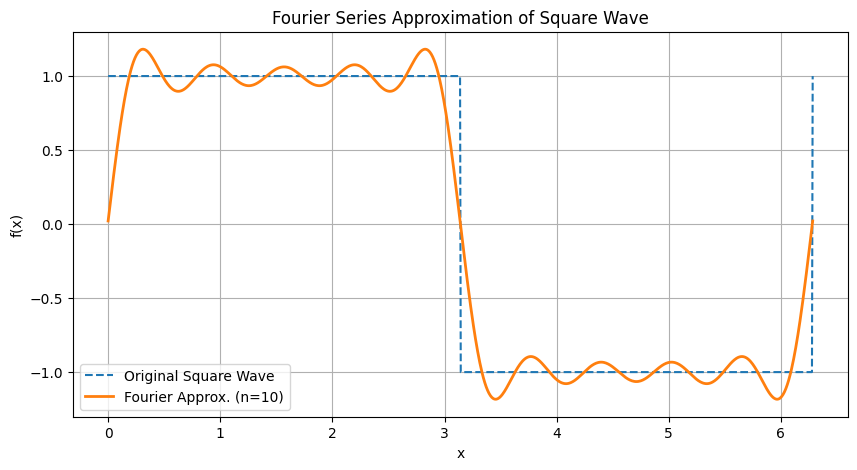

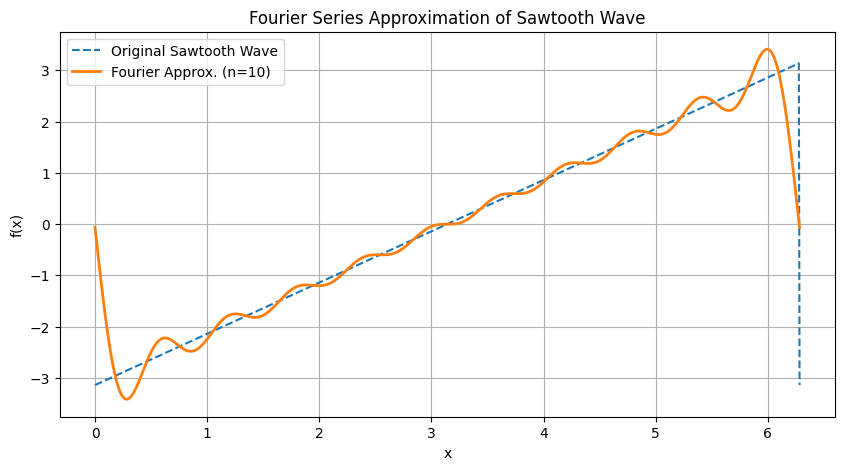

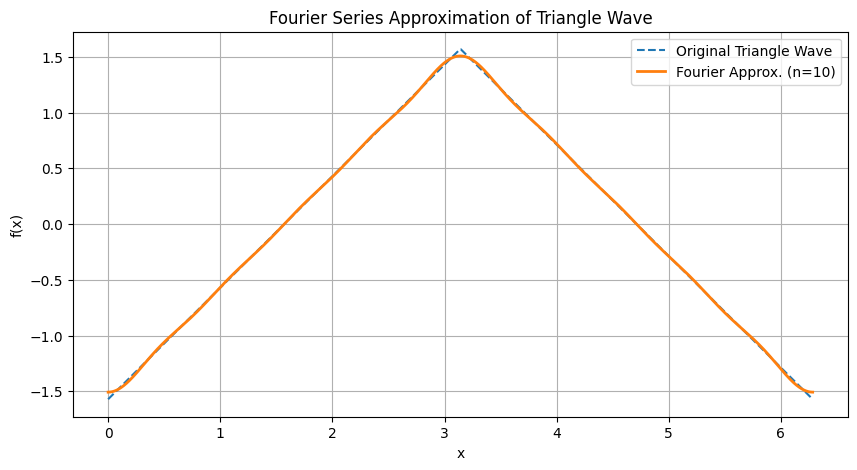

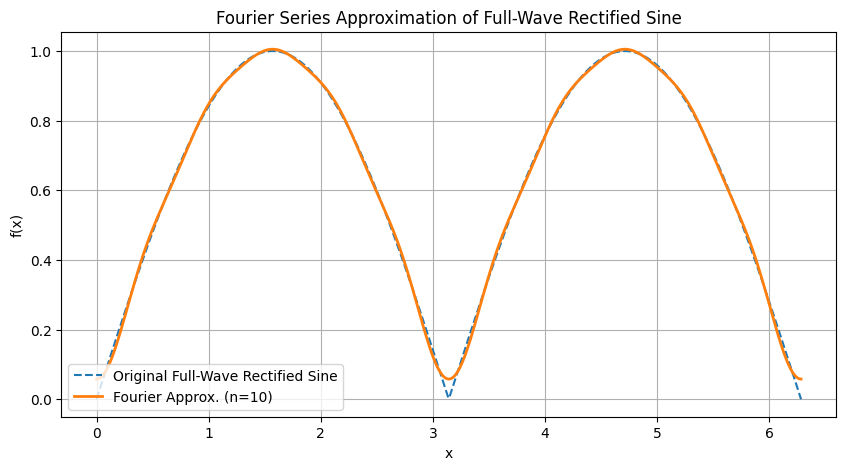

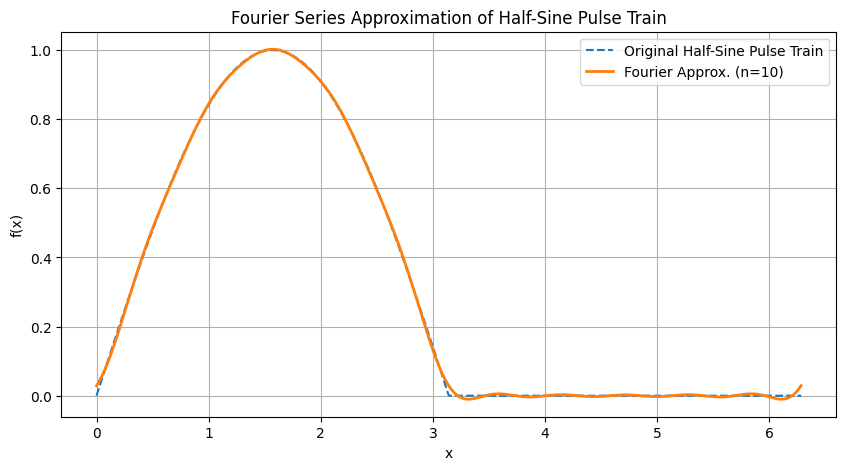

In [7]:
# Define test functions
test_functions = {
    "Square Wave": square_wave,
    "Sawtooth Wave": sawtooth_wave,
    "Triangle Wave": triangle_wave,
    "Full-Wave Rectified Sine": full_wave_rectified_sine,
    "Half-Sine Pulse Train": half_sine_pulse
}

# Set number of Fourier terms
n_terms = 10  
x_values = np.linspace(0, 2 * np.pi, 1000)

# Plot results for each test function
for name, func in test_functions.items():
    fourier_approx = fourier_series(func, T, n_terms, x_values)

    plt.figure(figsize=(10, 5))
    plt.plot(x_values, func(x_values), label=f'Original {name}', linestyle='dashed')
    plt.plot(x_values, fourier_approx, label=f'Fourier Approx. (n={n_terms})', linewidth=2)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(f"Fourier Series Approximation of {name}")
    plt.legend()
    plt.grid()
    plt.show()


### Fourier transform

The Continuous Fourier Transform (CFT) of a function $f(t)$ is defined as:

$
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} \,dt
$

and the inverse Continuous Fourier Transform is:

$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i\omega t} \,d\omega
$

The Discrete Fourier Transform (DFT) is a sampled version of the CFT, defined as:

$
X_k = \sum_{n=0}^{N-1} x_n e^{-i2\pi kn/N}
$

The Fast Fourier Transform (FFT) is an efficient algorithm to compute the DFT in $O(N \log N)$ time complexity compared to the $O(N^2)$ of the naive DFT approach. Its formulation is complex and let's leave it to library to deal with (Python, Matlab, Fortran, etc)

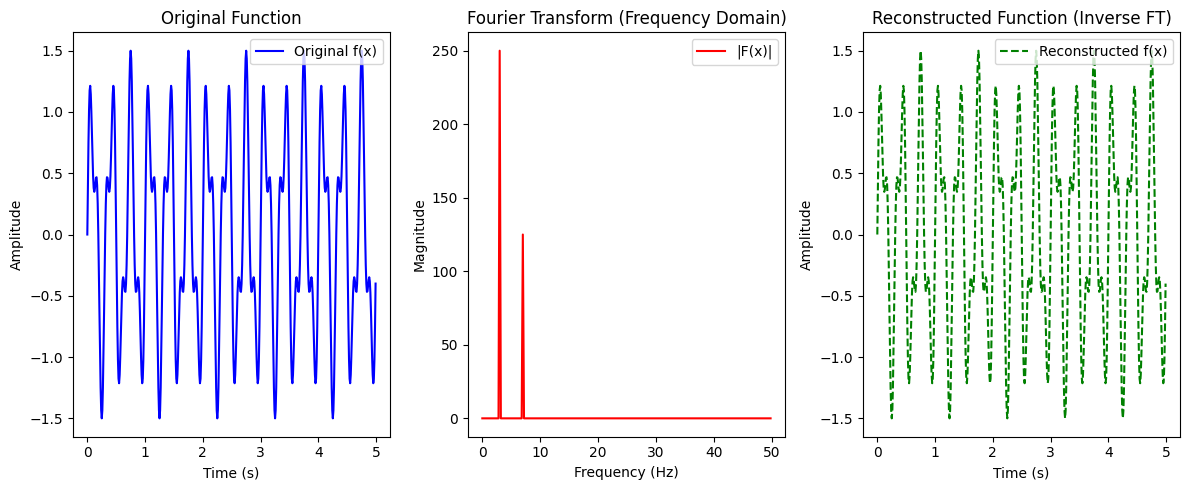

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

# Define a function f(x) (a combination of sinusoids)
def f(x):
    return np.sin(2 * np.pi * 3 * x) + 0.5 * np.sin(2 * np.pi * 7 * x)

# Define the time domain
N = 500  # Number of samples
T = 1.0 / 100  # Sampling interval (100 Hz sample rate)
x = np.linspace(0, N*T, N, endpoint=False)

# Compute Fourier Transform
F_x = fft(f(x))  # Compute FFT
freqs = fftfreq(N, T)  # Get frequency components

# Compute Inverse Fourier Transform
f_reconstructed = ifft(F_x).real  # Reconstruct the signal

# Plot Original Function and Reconstructed Function
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(x, f(x), label="Original f(x)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Function")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(freqs[:N//2], np.abs(F_x[:N//2]), label="|F(x)|", color="red")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform (Frequency Domain)")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, f_reconstructed, label="Reconstructed f(x)", color="green", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Function (Inverse FT)")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import time
from scipy.fftpack import fft # fft library of python is fast fourier transform

# ✅ Modern CPUs are highly optimized for FFT-like operations.
# ✅ Libraries like NumPy and SciPy use C-optimized FFT implementations (e.g., FFTW).

# Generate a signal
N = 2000  # Large number of points
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * 50 * x) + 0.5 * np.sin(2 * np.pi * 120 * x)  # Sum of sinusoids

# Compute DFT (brute force) - Very slow!
def dft_slow(signal):
    N = len(signal)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return X

start = time.time()
dft_result = dft_slow(y)  # Running brute-force DFT
end = time.time()
print(f"DFT Time: {end - start:.2f} seconds")

# Compute FFT (fast!)
start = time.time()
fft_result = fft(y)  # Using optimized FFT
end = time.time()
print(f"FFT Time: {end - start:.18f} seconds")


DFT Time: 4.20 seconds
FFT Time: 0.000000000000000000 seconds


### Laplace transform

The Laplace Transform converts a function from the time domain into the complex frequency domain. It is defined as:

$
F(s) = \int_{0}^{\infty} f(t) e^{-st} \,dt
$

and the inverse Laplace Transform is:

$
f(t) = \frac{1}{2\pi i} \int_{\sigma-i\infty}^{\sigma+i\infty} F(s) e^{st} \,ds
$

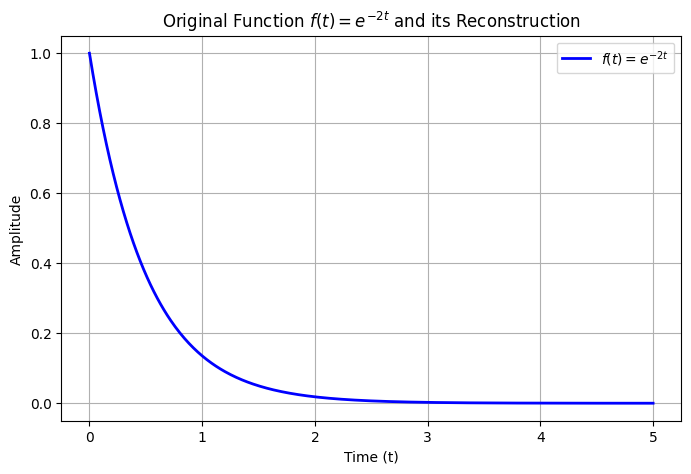

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbolic variable and function
t, s = sp.symbols('t s')
f_t = sp.exp(-2*t)  # Example function: f(t) = e^(-2t)

# Compute Laplace Transform
F_s = sp.laplace_transform(f_t, t, s, noconds=True)

# Compute Inverse Laplace Transform
f_t_reconstructed = sp.inverse_laplace_transform(F_s, s, t)

# Define time range
t_values = np.linspace(0, 5, 500)  # Time from 0 to 5

# Define original function f(t) = e^(-2t)
f_t_values = np.exp(-2 * t_values)

# Plot original function
plt.figure(figsize=(8, 5))
plt.plot(t_values, f_t_values, label=r"$f(t) = e^{-2t}$", color='blue', linewidth=2)

# Labels and title
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Original Function $f(t) = e^{-2t}$ and its Reconstruction")
plt.legend()
plt.grid()
plt.show()


🔥 What Does It Mean When Fourier Series and Laplace Transform Can Solve PDEs?
When we say that Fourier Series and Laplace Transform can solve Partial Differential Equations (PDEs), we mean that they transform complex differential equations into simpler algebraic or ordinary differential equations (ODEs), making them much easier to solve.

📌 Key Idea: Instead of solving the PDE directly in the original domain (time or space), we transform it into a new domain where the equation is algebraically simpler, solve it there, and then transform it back to the original domain.

🔹 How Fourier Series Helps Solve PDEs
✅ Fourier Series is useful for solving PDEs with periodic boundary conditions.
✅ It expands the solution as a sum of sine and cosine functions.
✅ Used in heat conduction (diffusion), wave propagation, and Laplace's equation.

Example: Solving the Heat Equation Using Fourier Series
The 1D Heat Equation (Diffusion Equation):